In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
x,y = np.meshgrid(np.arange(50),np.arange(50))
x0 = y0 = 25
sigma = 5
z = 10*np.exp(-((x-x0)**2+(y-y0)**2)/2/sigma)
z += np.random.uniform(size=2500).reshape(50,50)

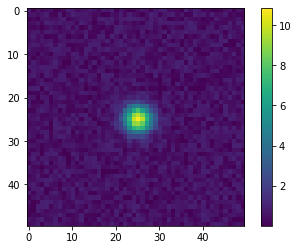

In [3]:
plt.imshow(z)
plt.colorbar();

In [4]:
def getFWHM1D(z, cy):
    p = z[:,cy]
    hm = max(p)/2
    i1 = np.argmax(p>hm)
    i2 = z.shape[0] - np.argmax(p[::-1]>hm) - 1
    fwhm = i2-i1+1+ (p[i1]-hm)/(p[i1]-p[i1-1]) + (p[i2]-hm)/(p[i2]-p[i2+1])
    return fwhm

def getFWHM2D(z, cx, cy):
    fwhmX = getFWHM1D(z, cy)
    fwhmY = getFWHM1D(z, cx)
    return (fwhmX+fwhmY)/2

In [5]:
%%time
fwhm = getFWHM2D(z,25,25)
print('FWHM = %.2f pixels'%fwhm)

FWHM = 6.34 pixels
CPU times: user 366 µs, sys: 225 µs, total: 591 µs
Wall time: 452 µs
